In [94]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import csv
import scipy.stats as st
from scipy.stats import linregress

import gmaps

# Census API Keys
from config import (api_key)

In [127]:
covid = pd.read_csv("complete_dataset.csv")
# covid = covid.set_index("State")

covid_df = covid.sort_values("Population", ascending=False)
covid_df

,State,Population,Median Household Income Est.,Cases,Deaths,Mortality Rate,Land Area (square miles),Population Density (people/square mile)
4,California,39512223,75250,640499,11523,1.799066,155959,253.350066
42,Texas,28995881,60632,577220,10798,1.870691,261797,110.757117
8,Florida,21477737,55433,579924,9757,1.682462,53927,398.274278
31,New York,19453561,67648,431298,32446,7.522873,47214,412.029504
37,Pennsylvania,12801989,60891,130286,7561,5.803386,44817,285.650289
12,Illinois,12671821,65063,211806,8017,3.785067,55584,227.976054
34,Ohio,11689100,56155,109923,3871,3.521556,40948,285.462049
9,Georgia,10617423,58634,224681,4691,2.087849,57906,183.356181
32,North Carolina,10488084,53922,147141,2425,1.648079,48711,215.312435
21,Michigan,9986857,56640,103527,6607,6.381910,56804,175.812566


The correlation between both factors is 0.38


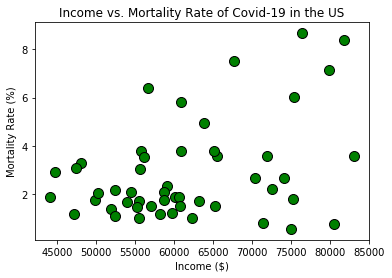

In [118]:
# Is there a correlation between Income and Mortality Rate of Covid-19? 
income = covid["Median Household Income Est."]
mortality_rate = covid["Mortality Rate"]
plt.scatter(income, mortality_rate, s=100, edgecolor= "black", color="green")
plt.xlabel("Income ($)")
plt.ylabel("Mortality Rate (%)")
plt.title("Income vs. Mortality Rate of Covid-19 in the US")
correlation = st.pearsonr(income,mortality_rate)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("Images/income_mortality.png")

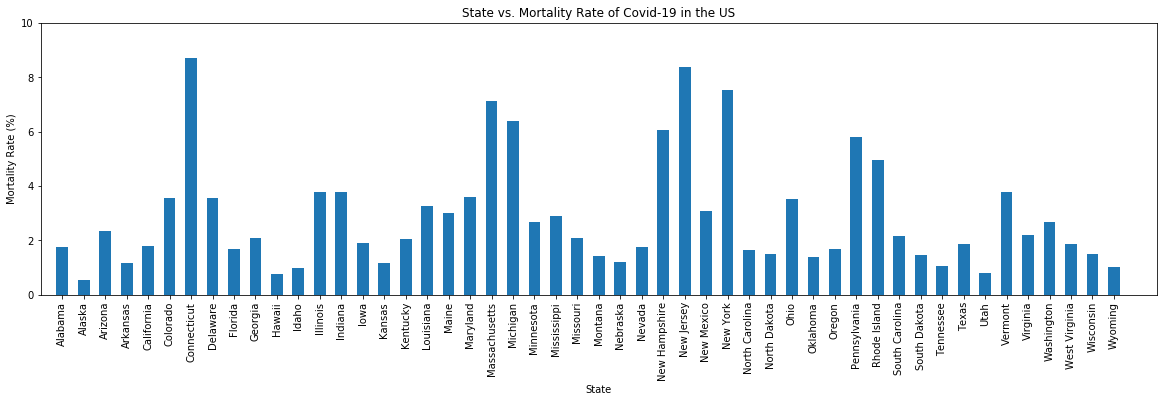

In [119]:
# What is the Mortality Rate comparison between the States? 
state = covid["State"]
plt.figure(figsize=(20,5))
plt.bar(state, mortality_rate, width=0.55, tick_label= state)
plt.xticks(rotation="vertical")
plt.xlim(-1, 51)
plt.ylim(0, 10)
plt.xlabel("State")
plt.ylabel("Mortality Rate (%)")
plt.title("State vs. Mortality Rate of Covid-19 in the US")
plt.savefig("Images/state_mortality.png")

The correlation between both factors is 0.2
The lower quartile of covid-19 cases is: 23605.5
The upper quartile of covid-19 cases is: 120637.5
The interquartile range of covid-19 cases is: 97032.0
The the median of occupancy is: 64429.5 
Values below -121942.5 could be outliers.
Values above 266185.5 could be outliers.


,State,Population,Median Household Income Est.,Cases,Deaths,Mortality Rate,Land Area (square miles),Population Density (people/square mile)
4,California,39512223,75250,640499,11523,1.799066,155959,253.350066
8,Florida,21477737,55433,579924,9757,1.682462,53927,398.274278
31,New York,19453561,67648,431298,32446,7.522873,47214,412.029504
42,Texas,28995881,60632,577220,10798,1.870691,261797,110.757117


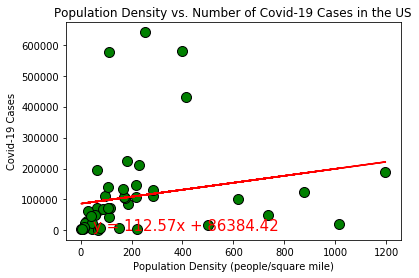

In [133]:
# Is there a correlation between Population Density and Number of Covid-19 Cases?
pop_dens = covid["Population Density (people/square mile)"]
cases = covid["Cases"]
plt.scatter(pop_dens, cases, s=100, edgecolor= "black", color="green")
plt.xlabel("Population Density (people/square mile)")
plt.ylabel("Covid-19 Cases")
plt.title("Population Density vs. Number of Covid-19 Cases in the US")
correlation = st.pearsonr(pop_dens,cases)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dens, cases)
regress_values = pop_dens * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(pop_dens,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.savefig("Images/density_cases.png")

quartiles = covid["Cases"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of covid-19 cases is: {lowerq}")
print(f"The upper quartile of covid-19 cases is: {upperq}")
print(f"The interquartile range of covid-19 cases is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_cases = covid.loc[(covid["Cases"] < lower_bound) | (covid["Cases"] > upper_bound)]
outlier_cases

The correlation between both factors is 0.31


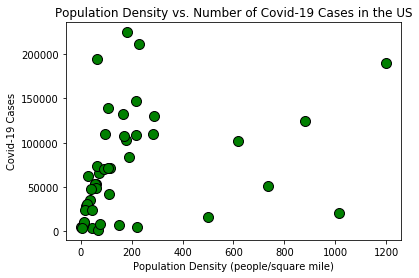

In [141]:
quartiles = covid["Cases"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
no_outliers = covid.loc[(covid["Cases"] > lower_bound) & (covid["Cases"] < upper_bound)]

pop_dens_no = no_outliers["Population Density (people/square mile)"]
cases_no = no_outliers["Cases"]
plt.scatter(pop_dens_no, cases_no, s=100, edgecolor= "black", color="green")
plt.xlabel("Population Density (people/square mile)")
plt.ylabel("Covid-19 Cases")
plt.title("Population Density vs. Number of Covid-19 Cases in the US")
correlation = st.pearsonr(pop_dens_no,cases_no)
print(f"The correlation between both factors is {round(correlation[0],2)}")
